In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Mobile price New - Mobile price New (1).csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,188,2,...,20.0,756,"2,549.00",9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,136,3,...,905.0,1988,"2,631.00",17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,145,5,...,1263.0,1716,"2,603.00",11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,131,6,...,1216.0,1786,"2,769.00",16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,141,2,...,1208.0,1212,"1,411.00",8,2,15,1,1,0,1.0


- Find the size of the dataset
- Find out the datatypes for each column
- Find the statistical summery for **ALL** columns
- Clean the columns, where the datatypes are not correct
- Handle the null values
- Do some Outlier study and remove the outliers appropriately.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1999 non-null   object 
 1   blue           2000 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2001 non-null   int64  
 5   four_g         2001 non-null   int64  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   object 
 9   n_cores        2001 non-null   int64  
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       1999 non-null   object 
 13  ram            2001 non-null   object 
 14  sc_h           2001 non-null   int64  
 15  sc_w           2001 non-null   int64  
 16  talk_time      2001 non-null   int64  
 17  three_g        2001 non-null   int64  
 18  touch_sc

In [43]:
df.dtypes

battery_power     object
blue             float64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt         object
n_cores            int64
pc               float64
px_height        float64
px_width          object
ram               object
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

In [19]:
df["ram"] = df["ram"].str.replace(",","")

In [26]:
df["ram"] = pd.to_numeric(df["ram"] , errors = "coerce")

In [27]:
for i in df.select_dtypes("object").columns:
    df[i] = pd.to_numeric(df[i] , errors = "coerce")

In [28]:
df.dtypes

battery_power    float64
blue             float64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores            int64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

In [29]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1997.000000,2000.000000,1998.000000,2000.000000,2001.000000,2001.000000,2000.00000,2000.000000,1999.000000,2001.000000,...,2000.000000,1998.000000,1999.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,1999.000000
mean,1238.443665,0.495500,1.523173,0.509500,4.309345,0.521739,32.05450,0.501600,140.262631,4.519740,...,644.772500,1251.184184,2123.515258,12.304348,5.767616,11.015492,0.761619,0.502749,0.506747,1.499250
std,439.256096,0.500105,0.816485,0.500035,4.340364,0.499652,18.14481,0.288234,35.401989,2.287517,...,443.662376,432.267431,1085.243808,4.213292,4.355396,5.466284,0.426200,0.500117,0.500079,1.118985
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.00000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.00000,0.200000,109.000000,3.000000,...,282.750000,874.250000,1205.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1227.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.00000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.00000,0.800000,170.000000,7.000000,...,946.250000,1632.750000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.500000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.00000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [30]:
df.shape

(2001, 21)

In [31]:
df.isnull().sum()

battery_power    4
blue             1
clock_speed      3
dual_sim         1
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        2
n_cores          0
pc               1
px_height        1
px_width         3
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      2
dtype: int64

In [32]:
# very less null as compared number of record simply we can drop
df = df.dropna()

In [36]:
df.shape

(1980, 21)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_15664\1868862352.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


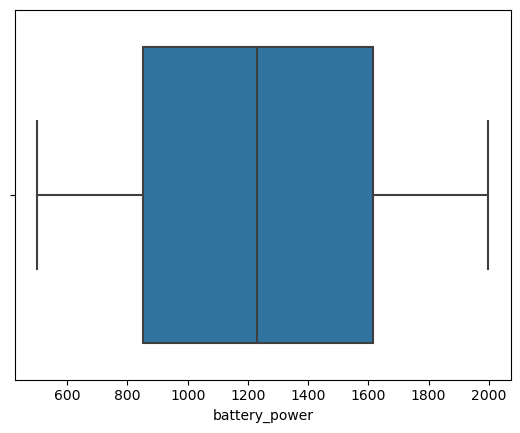

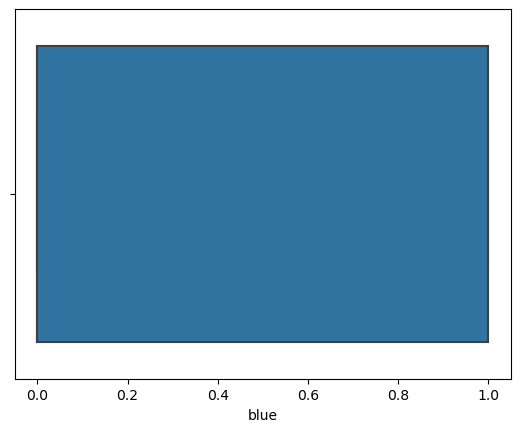

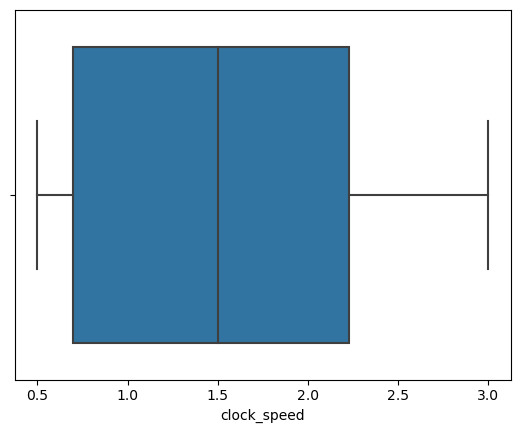

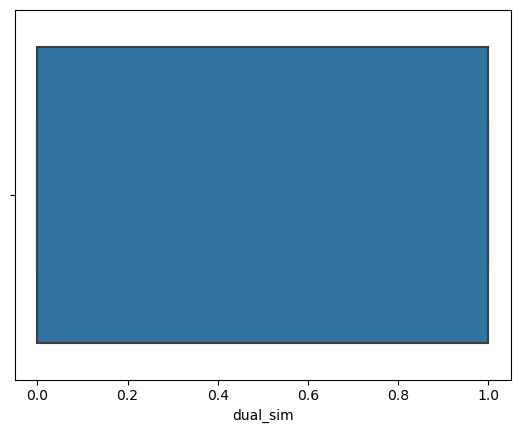

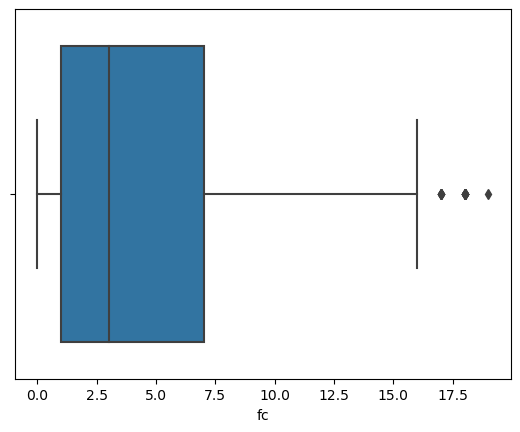

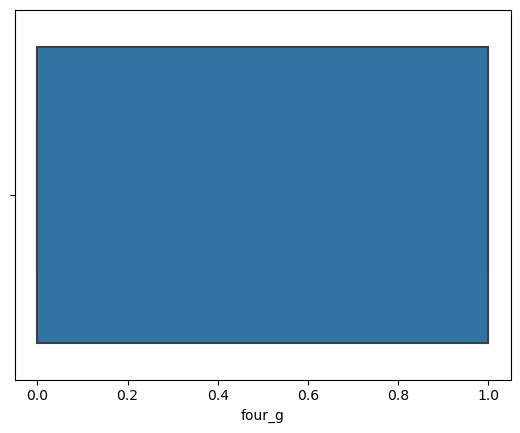

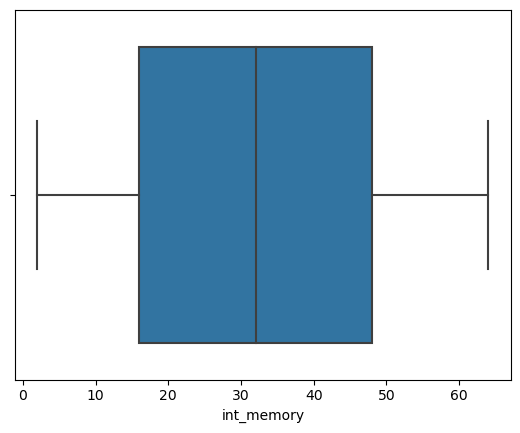

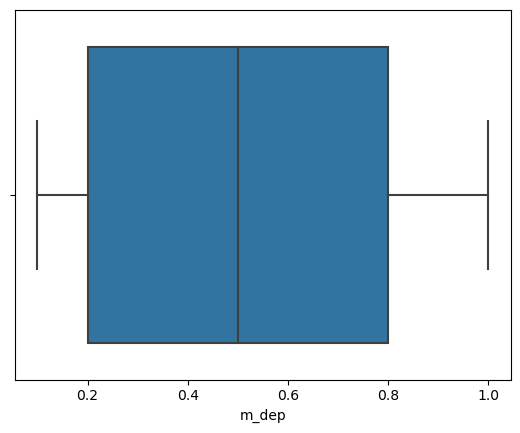

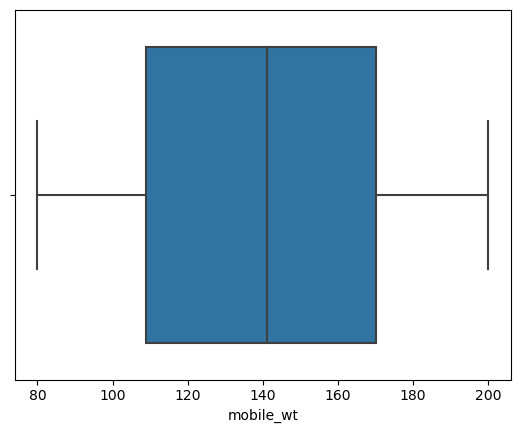

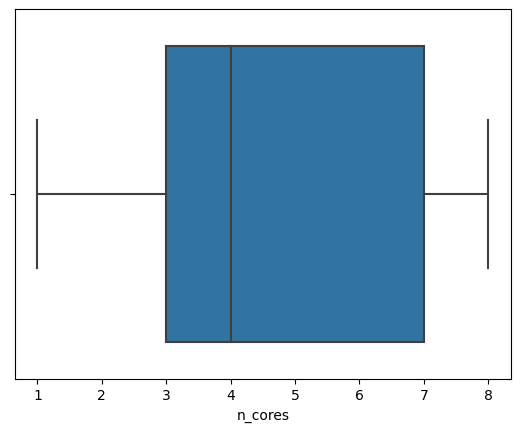

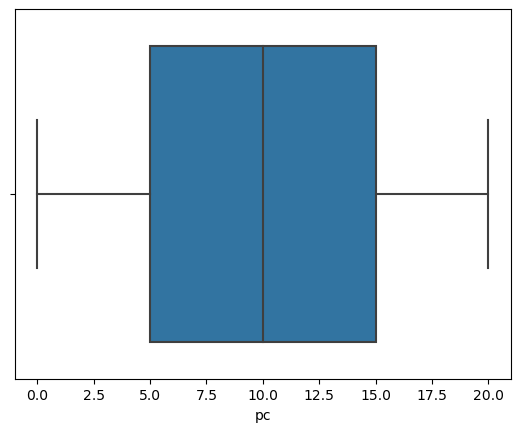

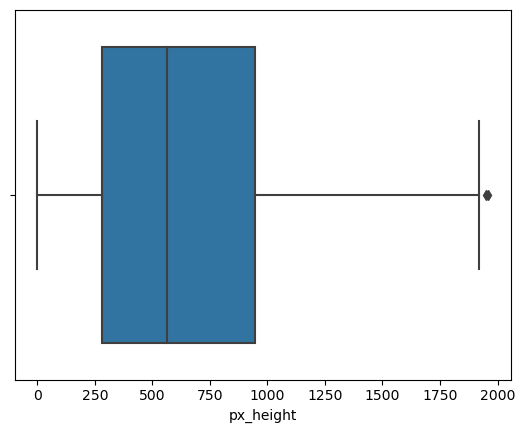

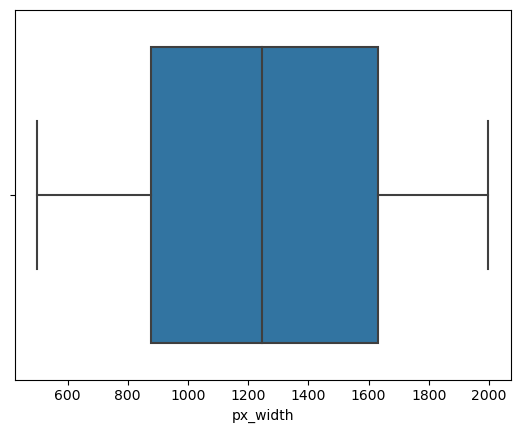

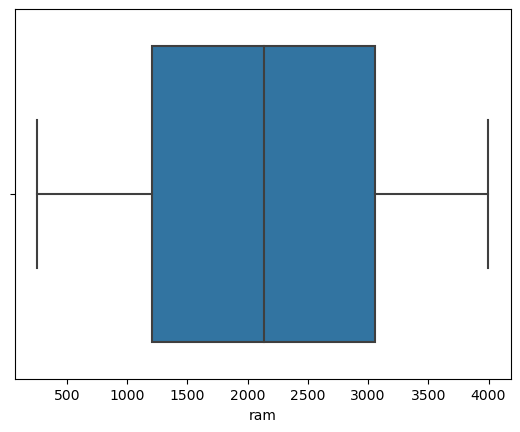

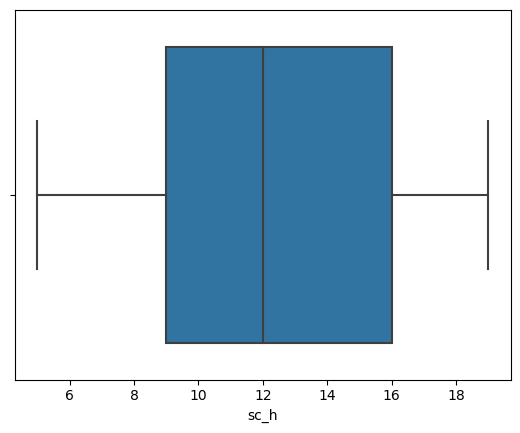

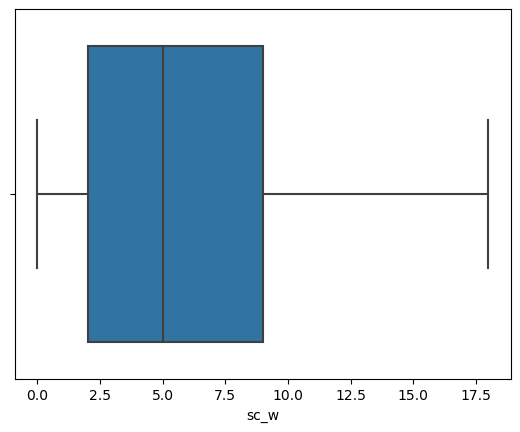

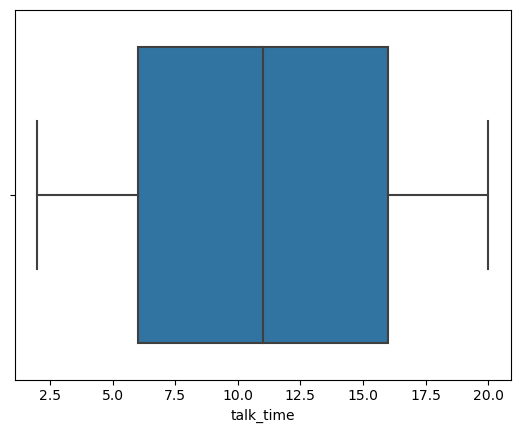

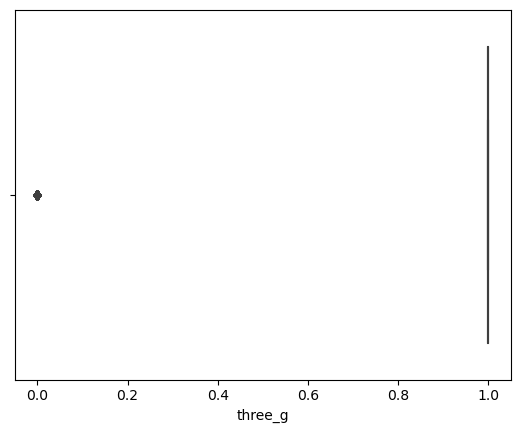

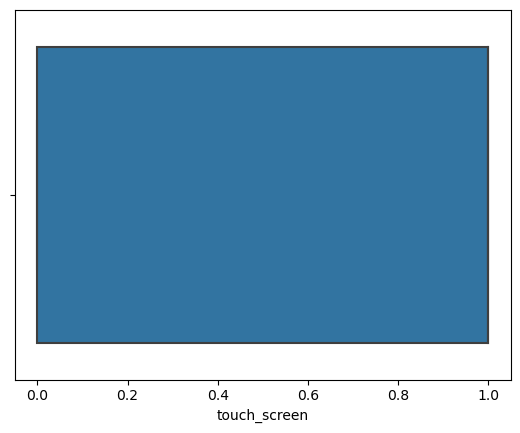

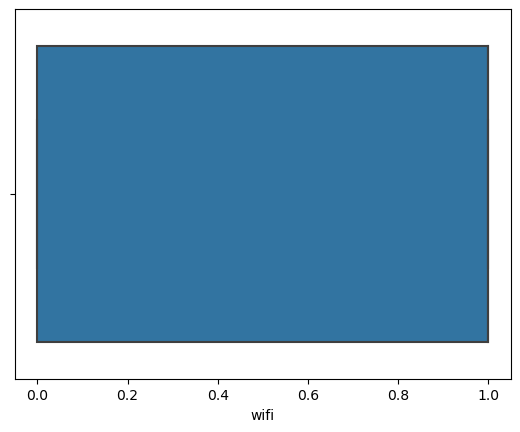

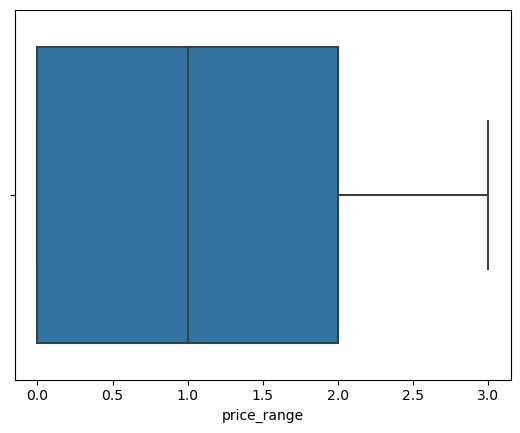

In [37]:
for i in df.columns:
    plt.figure()
    sns.boxplot(x = df[i])

    

In [ ]:
# there is very very less outliers we can ignore it